In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

data_dir = "../data"
file_paths = {
    "benin": os.path.join(data_dir, "benin-malanville.csv"),
    "sierra_leone": os.path.join(data_dir, "sierraleone-bumbuna.csv"),
    "togo": os.path.join(data_dir, "togo-dapaong_qc.csv"),
}

# Read CSVs into DataFrames

In [3]:
dataframes = {}
for name, path in file_paths.items():
    dataframes[name] = pd.read_csv(path)

for name, df in dataframes.items():
    print(f"Dataframe {name.upper()}:")
    print(df.head())
    print()

Dataframe BENIN:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Da

## Function for comprehensive EDA on each DataFrame

In [4]:
def perform_eda(df, name):
    print(f"\n** {name.upper()} Data **")

## Summary Statistics

In [5]:
print("\nSummary Statistics:")
summary = df.describe(include='all')
summary


Summary Statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-10-24 23:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,NaN,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,NaN,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,NaN,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,NaN,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN


## Data Quality Check

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


## Check for outliers (using IQR)

In [7]:
print("\nOutlier Detection (Interquartile Range):")
for col in df.select_dtypes(include=[np.number]):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"- Column: {col}")
    if outliers.empty:
        print("  No outliers detected.")
    else:
        print(f"  Number of outliers: {outliers.shape[0]}")


Outlier Detection (Interquartile Range):
- Column: GHI
  Number of outliers: 1303
- Column: DNI
  Number of outliers: 50586
- Column: DHI
  Number of outliers: 7905
- Column: ModA
  Number of outliers: 1237
- Column: ModB
  Number of outliers: 1537
- Column: Tamb
  No outliers detected.
- Column: RH
  No outliers detected.
- Column: WS
  Number of outliers: 8708
- Column: WSgust
  Number of outliers: 7377
- Column: WSstdev
  Number of outliers: 14669
- Column: WD
  No outliers detected.
- Column: WDstdev
  Number of outliers: 6921
- Column: BP
  Number of outliers: 19228
- Column: Cleaning
  Number of outliers: 281
- Column: Precipitation
  Number of outliers: 3338
- Column: TModA
  Number of outliers: 137
- Column: TModB
  Number of outliers: 573
- Column: Comments
  No outliers detected.


## Look for inconsistencies (negative values in positive columns)


In [8]:
print("\nInconsistency Check (Negative Values in Positive Columns):")
for col in df.select_dtypes(include=[np.number]):
    if col in ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]:
        negatives = df[df[col] < 0]
        if negatives.empty:
            print(f"  Column: {col} - No negative values found.")
        else:
            print(f"  Column: {col} - {negatives.shape[0]} negative values found.")


Inconsistency Check (Negative Values in Positive Columns):
  Column: GHI - 257385 negative values found.
  Column: DNI - No negative values found.
  Column: DHI - No negative values found.
  Column: Tamb - No negative values found.
  Column: WS - No negative values found.
  Column: TModA - No negative values found.
  Column: TModB - No negative values found.


## Time Series Analysis (Optional)


In [9]:
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title(f"{name} - Time Series")
plt.show()

## Correlation Analysis

In [9]:
print("\nCorrelation Matrix:")
corr = df.select_dtypes(include=[np.number]).corr()
corr


Correlation Matrix:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.877293,0.852080,0.994964,0.995439,0.562533,-0.258077,0.421698,0.443923,0.399646,0.089896,0.479291,0.059116,0.024725,-0.034598,0.898211,0.919220,NaN
DNI,0.877293,1.000000,0.532717,0.889702,0.889708,0.504499,-0.327887,0.366667,0.384870,0.343437,-0.017950,0.397511,0.047465,0.019777,-0.031397,0.765881,0.783572,NaN
DHI,0.852080,0.532717,1.000000,0.833037,0.832648,0.489758,-0.155016,0.390597,0.410531,0.367005,0.154095,0.454318,0.052307,0.026179,-0.033330,0.802319,0.820360,NaN
ModA,0.994964,0.889702,0.833037,1.000000,0.999564,0.561114,-0.287038,0.420344,0.442563,0.398559,0.057154,0.472525,0.064175,0.022523,-0.034314,0.886888,0.906796,NaN
ModB,0.995439,0.889708,0.832648,0.999564,1.000000,0.556133,-0.280072,0.421543,0.443570,0.398978,0.061090,0.472106,0.068740,0.023482,-0.034269,0.885551,0.906427,NaN
Tamb,0.562533,0.504499,0.489758,0.561114,0.556133,1.000000,-0.400410,0.197145,0.221104,0.227084,0.094900,0.361367,-0.520770,0.019391,-0.060178,0.805580,0.740832,NaN
RH,-0.258077,-0.327887,-0.155016,-0.287038,-0.280072,-0.400410,1.000000,-0.147589,-0.131119,-0.075714,0.521269,-0.075874,0.225176,-0.007095,0.068177,-0.244825,-0.224668,NaN
WS,0.421698,0.366667,0.390597,0.420344,0.421543,0.197145,-0.147589,1.000000,0.977587,0.728018,0.164655,0.505133,0.087915,0.008371,0.099562,0.328273,0.353334,NaN
WSgust,0.443923,0.384870,0.410531,0.442563,0.443570,0.221104,-0.131119,0.977587,1.000000,0.827358,0.185546,0.562013,0.085957,0.009440,0.107898,0.357374,0.380626,NaN
WSstdev,0.399646,0.343437,0.367005,0.398559,0.398978,0.227084,-0.075714,0.728018,0.827358,1.000000,0.240927,0.593584,0.065415,0.010888,0.105231,0.345920,0.359923,NaN


## Wind Analysis


Wind Analysis:


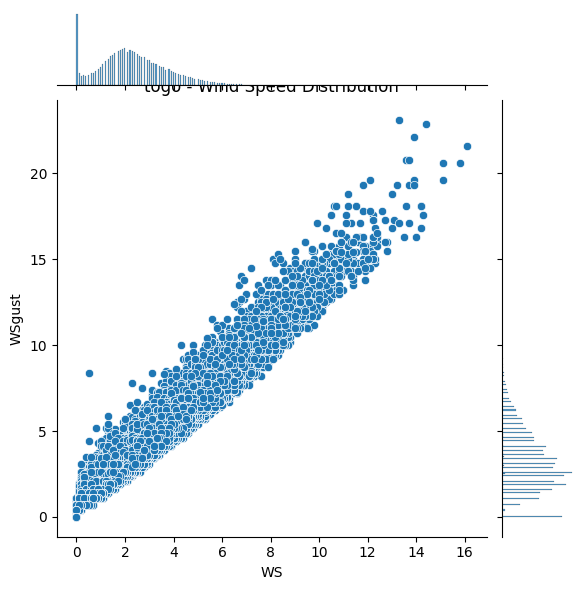

In [10]:
print("\nWind Analysis:")
sns.jointplot(x="WS", y="WSgust", data=df)
plt.title(f"{name} - Wind Speed Distribution")
plt.show()

## Temperature Analysis


Temperature Analysis:


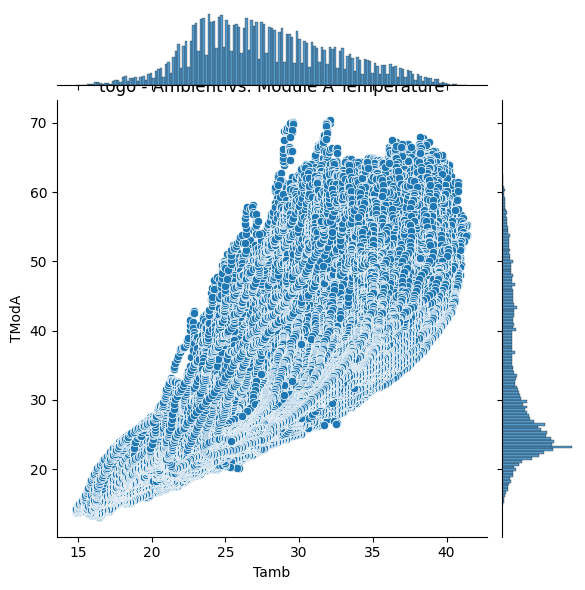

In [11]:
print("\nTemperature Analysis:")
sns.jointplot(x="Tamb", y="TModA", data=df)
plt.title(f"{name} - Ambient vs. Module A Temperature")
plt.show()

## Histograms


Histograms:
Error generating histograms: num must be an integer with 1 <= num <= 12, not 13


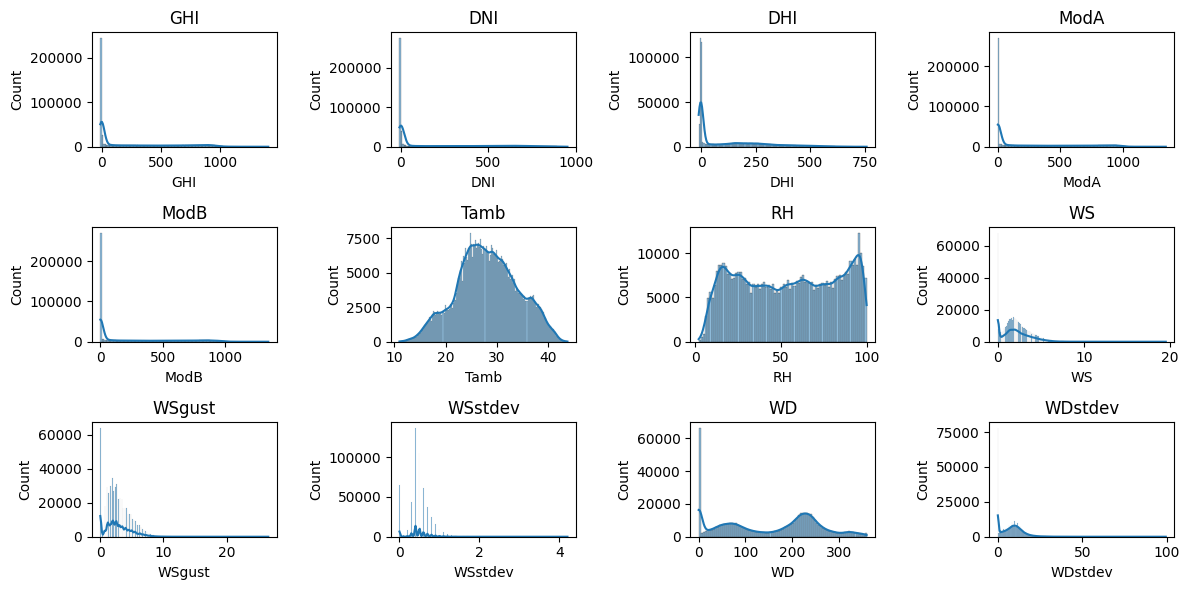

In [12]:
try:
  print("\nHistograms:")

  for name, df in dataframes.items():
    df = df.replace(to_replace=np.inf, value=np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols):
      plt.subplot(3, 4, i+1)
      sns.histplot(df[col], kde=True)  
      plt.title(col)
      plt.tight_layout()
    plt.suptitle(f"{name} - Histograms", y=1.02)  
    plt.show()

except Exception as e:
  print(f"Error generating histograms: {e}")

## Boxplots


Boxplots:
Error generating histograms: num must be an integer with 1 <= num <= 12, not 13


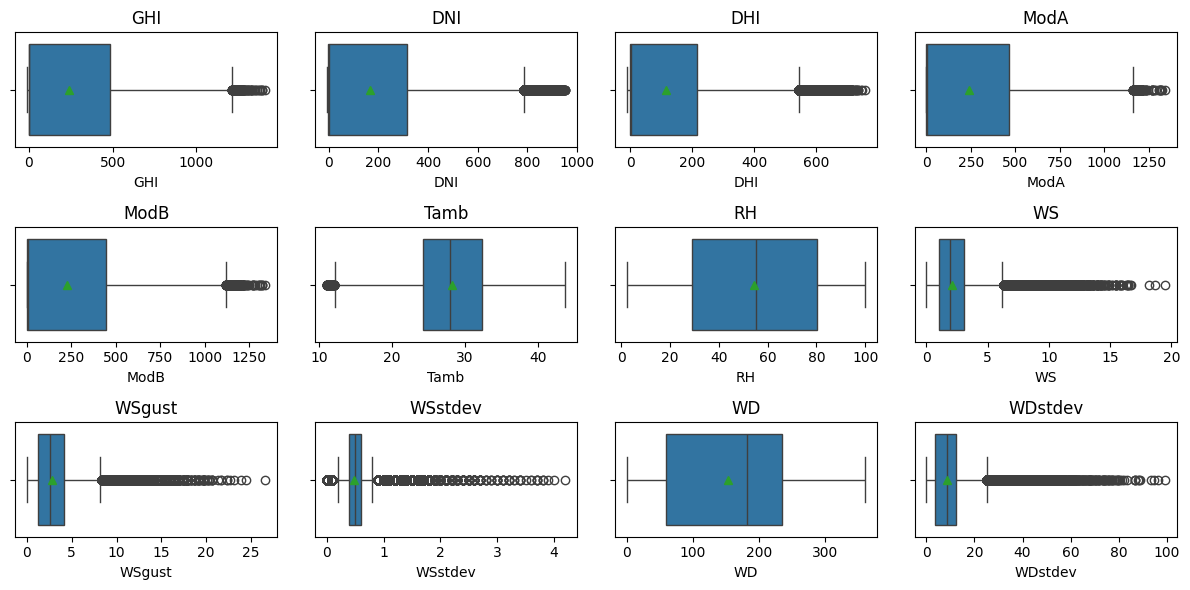

In [13]:
try:
    print("\nBoxplots:")
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols):
        plt.subplot(3, 4, i+1)
        sns.boxplot(x=col, showmeans=True, data=df)
        plt.title(col)
        plt.tight_layout()
    plt.suptitle(f"{name} - Boxplots", y=1.02)
    plt.show()

except Exception as e:
  print(f"Error generating histograms: {e}")

## Scatter Plots (Optional)

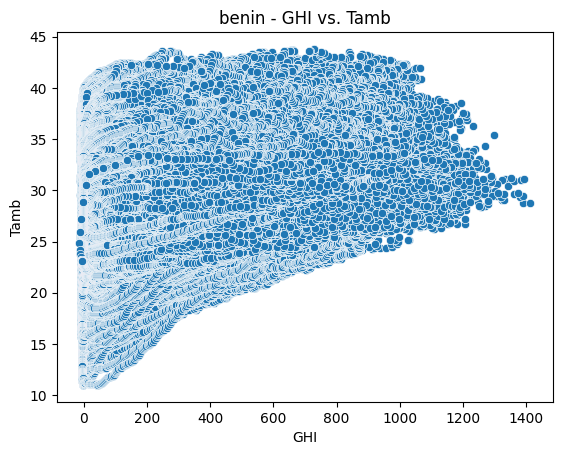

In [14]:
try:
    sns.scatterplot(x="GHI", y="Tamb", data=df)
    plt.title(f"{name} - GHI vs. Tamb")
    plt.show()

except Exception as e:
  print(f"Error generating histograms: {e}")


Histograms:
Error generating histograms: num must be an integer with 1 <= num <= 12, not 13


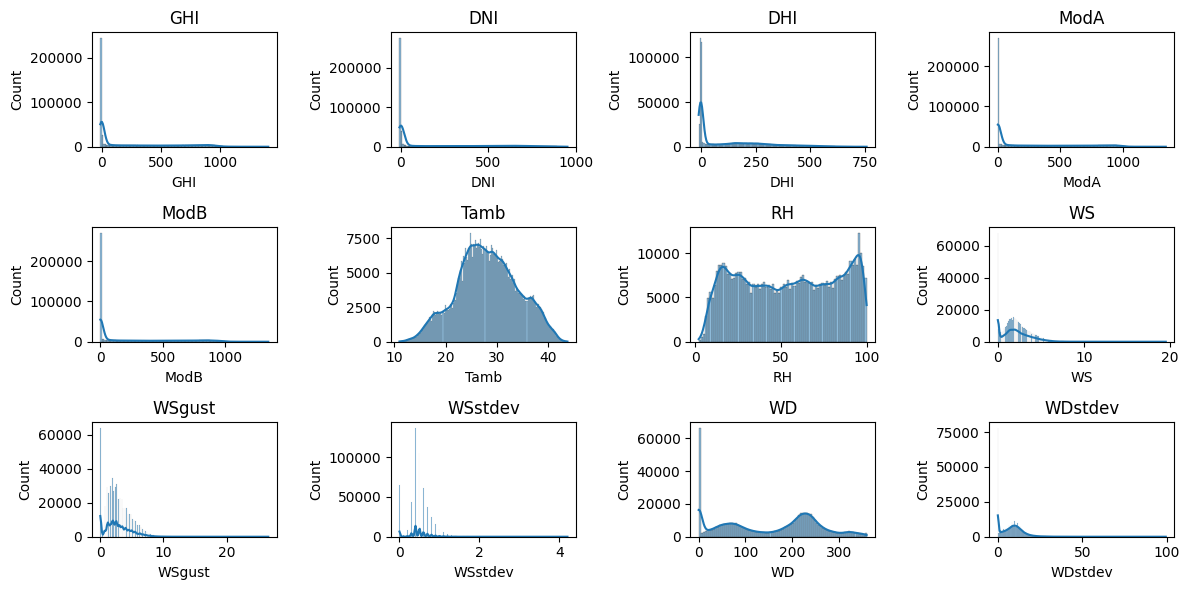

In [15]:
try:
  print("\nHistograms:")

  # Loop through each DataFrame in the dictionary
  for name, df in dataframes.items():
    # Replace inf with NaN (recommended)
    df = df.replace(to_replace=np.inf, value=np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols):
      plt.subplot(3, 4, i+1)
      sns.histplot(df[col], kde=True)  
      plt.title(col)
      plt.tight_layout()  
    plt.suptitle(f"{name} - Histograms", y=1.02)  
    plt.show()

except Exception as e:
  print(f"Error generating histograms: {e}")